In [1]:
pip install git+ssh://github.com/jamalsenouci/causalimpact.git

  Cloning ssh://github.com/jamalsenouci/causalimpact.git to c:\users\sam~1.ing\appdata\local\temp\pip-req-build-i6j72ayq
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q ssh://github.com/jamalsenouci/causalimpact.git 'C:\Users\SAM~1.ING\AppData\Local\Temp\pip-req-build-i6j72ayq'
  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git clone -q ssh://github.com/jamalsenouci/causalimpact.git 'C:\Users\SAM~1.ING\AppData\Local\Temp\pip-req-build-i6j72ayq'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [2]:
!git clone https://github.com/jamalsenouci/causalimpact.git

'git' is not recognized as an internal or external command,
operable program or batch file.


In [19]:
from causalimpact import CausalImpact

In [23]:
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, r'C:\Users\sam.ingleston\Anaconda3\Lib\site-packagescausalimpact-master')

import setup.py

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\sam.ingleston\Anaconda3\lib\distutils\fancy_getopt.py", line 233, in getopt
    opts, args = getopt.getopt(args, short_opts, self.long_opts)
  File "C:\Users\sam.ingleston\Anaconda3\lib\getopt.py", line 95, in getopt
    opts, args = do_shorts(opts, args[0][1:], shortopts, args[1:])
  File "C:\Users\sam.ingleston\Anaconda3\lib\getopt.py", line 195, in do_shorts
    if short_has_arg(opt, shortopts):
  File "C:\Users\sam.ingleston\Anaconda3\lib\getopt.py", line 211, in short_has_arg
    raise GetoptError(_('option -%s not recognized') % opt, opt)
getopt.GetoptError: option -f not recognized

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\sam.ingleston\Anaconda3\lib\distutils\core.py", line 134, in setup
    ok = dist.parse_command_line()
  File "C:\Users\sam.ingleston\Anaconda3\lib\site-packages\setuptools\dist.py", line 707, in parse_command_line
    result = _Di

TypeError: can only concatenate str (not "list") to str

In [146]:
from causalimpact import CausalImpact
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 6)
data = pd.read_csv(r'C:\Users\sam.ingleston\Documents\Python Files\RadioGermanyAcq.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data = data.dropna(0)

In [148]:
data.shape
data.head()

,Munich,Hamburg
0,199.0,227.0
1,180.0,288.0
2,2393.0,3130.0
3,65.0,88.0
4,85.0,163.0


In [149]:
data

,Munich,Hamburg
0,199.0,227.0
1,180.0,288.0
2,2393.0,3130.0
3,65.0,88.0
4,85.0,163.0
...,...,...
431,292.0,320.0
432,235.0,221.0
433,21.0,26.0
434,30.0,23.0


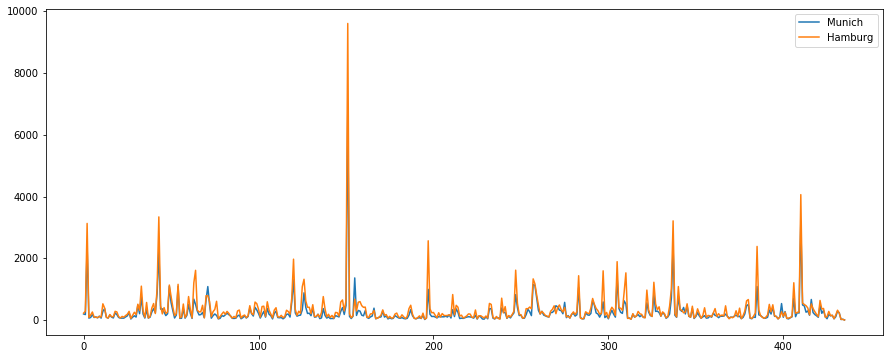

In [150]:
data.plot()

In [151]:
pre_period = [0,424]
post_period = [425,433]
impact = CausalImpact(data, pre_period, post_period)
impact.run()
impact.inferences

,response,cum_response,point_pred,point_pred_lower,point_pred_upper,cum_pred,cum_pred_lower,cum_pred_upper,point_effect,point_effect_lower,point_effect_upper,cum_effect,cum_effect_lower,cum_effect_upper
0,199.0,199.0,164.293832,-869902.959062,870231.546726,164.293832,-869902.959062,8.702315e+05,34.706168,870101.959062,-870032.546726,0.000000,0.000000,0.000000
1,180.0,379.0,240.256888,-67.517154,548.030930,404.550720,-869970.476216,8.707796e+05,-60.256888,247.517154,-368.030930,0.000000,0.000000,0.000000
2,2393.0,2772.0,2132.288846,1865.734314,2398.843379,2536.839566,-868104.741903,8.731784e+05,260.711154,527.265686,-5.843379,0.000000,0.000000,0.000000
3,65.0,2837.0,161.805706,-89.517882,413.129294,2698.645272,-868194.259784,8.735916e+05,-96.805706,154.517882,-348.129294,0.000000,0.000000,0.000000
4,85.0,2922.0,188.302531,-55.053614,431.658677,2886.947803,-868249.313399,8.740232e+05,-103.302531,140.053614,-346.658677,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,292.0,108965.0,242.747352,22.958922,462.535782,109169.280544,-855929.175880,1.074268e+06,49.252648,269.041078,-170.535782,-52.830946,1484.954770,-1590.616662
432,235.0,109200.0,175.789448,-44.033886,395.612783,109345.069992,-855973.209767,1.074663e+06,59.210552,279.033886,-160.612783,6.379606,1763.988657,-1751.229445
433,21.0,109221.0,43.902668,-175.955565,263.760901,109388.972660,-856149.165332,1.074927e+06,-22.902668,196.955565,-242.760901,-16.523062,1960.944222,-1993.990345
434,30.0,109251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


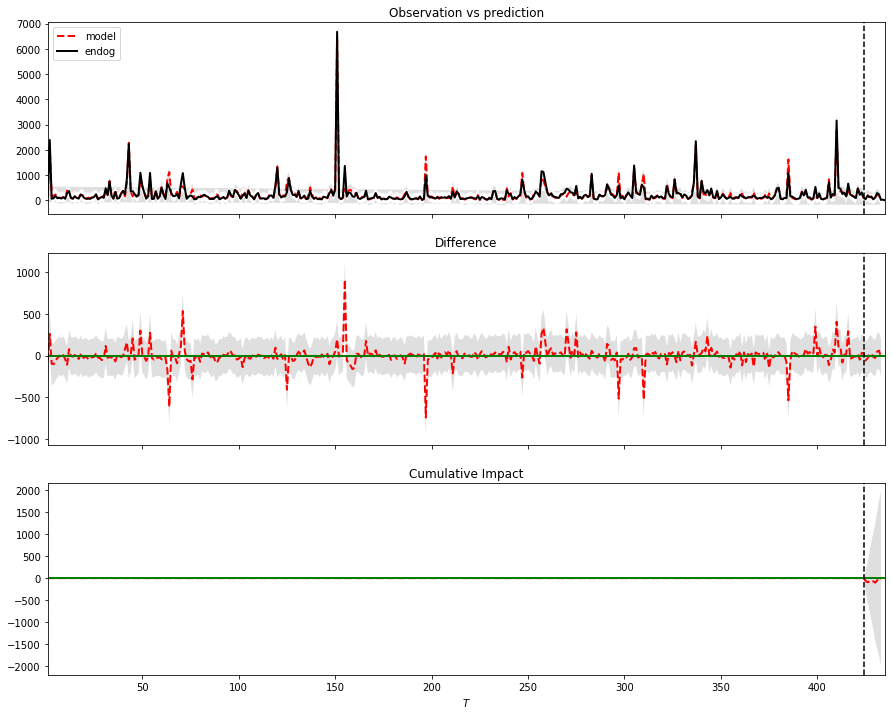

In [152]:
impact.plot()

In [153]:
date_range = pd.date_range(start="2019-01-01", periods=436)
data.index = date_range
data.head()

,Munich,Hamburg
2019-01-01,199.0,227.0
2019-01-02,180.0,288.0
2019-01-03,2393.0,3130.0
2019-01-04,65.0,88.0
2019-01-05,85.0,163.0


In [154]:
pre_period = [pd.to_datetime(date) for date in ["2019-01-01", "2020-03-04"]]
post_period = [pd.to_datetime(date) for date in ["2020-03-05", "2020-03-11"]]
impact = CausalImpact(data, pre_period, post_period)
impact.run()
impact.inferences.head(20)

,response,cum_response,point_pred,point_pred_lower,point_pred_upper,cum_pred,cum_pred_lower,cum_pred_upper,point_effect,point_effect_lower,point_effect_upper,cum_effect,cum_effect_lower,cum_effect_upper
2019-01-01,199.0,199.0,164.291846,-866207.616560,866536.200251,164.291846,-866207.616560,866536.200251,34.708154,866406.616560,-866337.200251,0.0,0.0,0.0
2019-01-02,180.0,379.0,240.262347,-66.397601,546.922295,404.554193,-866274.014161,867083.122546,-60.262347,246.397601,-366.922295,0.0,0.0,0.0
2019-01-03,2393.0,2772.0,2132.546642,1866.959138,2398.134146,2537.100835,-864407.055023,869481.256692,260.453358,526.040862,-5.134146,0.0,0.0,0.0
2019-01-04,65.0,2837.0,161.698283,-88.711513,412.108079,2698.799118,-864495.766536,869893.364771,-96.698283,153.711513,-347.108079,0.0,0.0,0.0
2019-01-05,85.0,2922.0,188.232801,-54.236568,430.702170,2887.031918,-864550.003104,870324.066941,-103.232801,139.236568,-345.702170,0.0,0.0,0.0
2019-01-06,176.0,3098.0,235.195317,-2.386073,472.776707,3122.227236,-864552.389176,870796.843648,-59.195317,178.386073,-296.776707,0.0,0.0,0.0
2019-01-07,86.0,3184.0,114.369688,-119.899461,348.638836,3236.596923,-864672.288637,871145.482484,-28.369688,205.899461,-262.638836,0.0,0.0,0.0
2019-01-08,104.0,3288.0,103.538052,-128.338894,335.414997,3340.134975,-864800.627531,871480.897481,0.461948,232.338894,-231.414997,0.0,0.0,0.0
2019-01-09,75.0,3363.0,98.861050,-131.207755,328.929854,3438.996025,-864931.835285,871809.827335,-23.861050,206.207755,-253.929854,0.0,0.0,0.0
2019-01-10,128.0,3491.0,122.574136,-106.080536,351.228807,3561.570161,-865037.915821,872161.056142,5.425864,234.080536,-223.228807,0.0,0.0,0.0


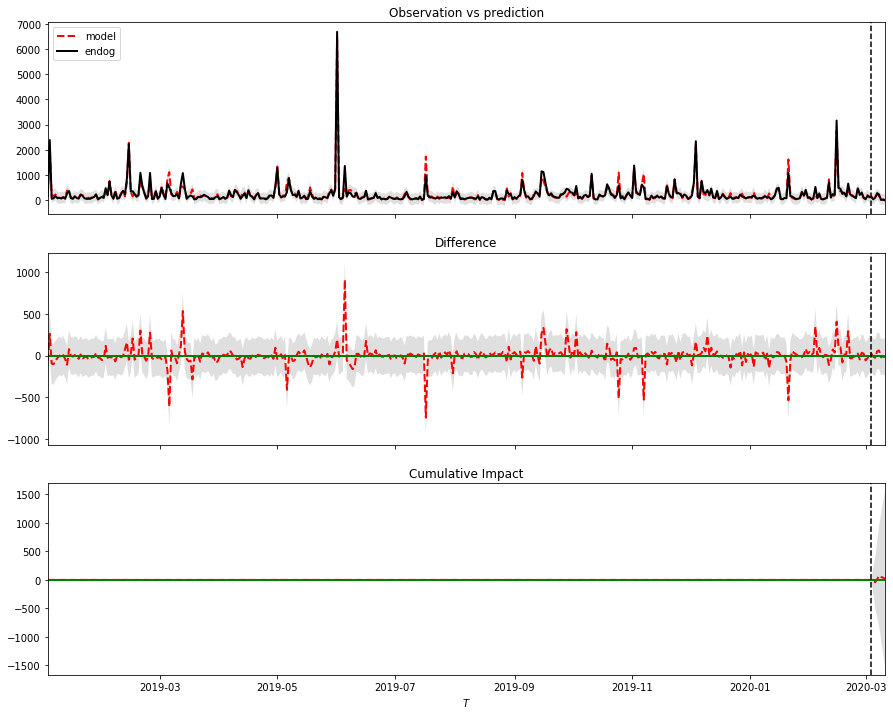

In [155]:
impact.plot()

In [156]:
impact.summary()

                                  Average         Cumulative
Actual                                105                737
Predicted                             102                719
95% CI                        [-115, 321]       [-811, 2250]
                                                            
Absolute Effect                         2                 17
95% CI                        [221, -216]      [1548, -1513]
                                                            
Relative Effect                      2.5%               2.5%
95% CI                  [215.4%, -210.4%]  [215.4%, -210.4%]
                                                            
P-value                              0.2%                   
Prob. of Causal Effect              99.8%                   


In [157]:
impact.summary("report")

 During the post-intervention period, the response variable had an average value of approx. 105.  By contrast, in  the
absence of an intervention, we would have expected an average response of 102. The 95% interval of this counterfactual
prediction is [-115, 321]. Subtracting this prediction from the observed response yields an estimate of the causal
effect the intervention had on the response variable. This effect is 2 with a 95% interval of [221, -216]. For a
discussion of the significance of this effect, see below.


 Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully
interpreted), the response variable had an overall value of 737.  By contrast, had  the intervention not taken place, we
would have expected a sum of 737. The 95% interval of this prediction is [-811, 2250]


 The above results are given in terms of absolute numbers. In relative terms, the response variable showed  an increase
of  2.5%. The 95% interval o

In [158]:
impact = CausalImpact(data, pre_period, post_period, model_args={"niter":5000, "nseasons":7})
impact.run()

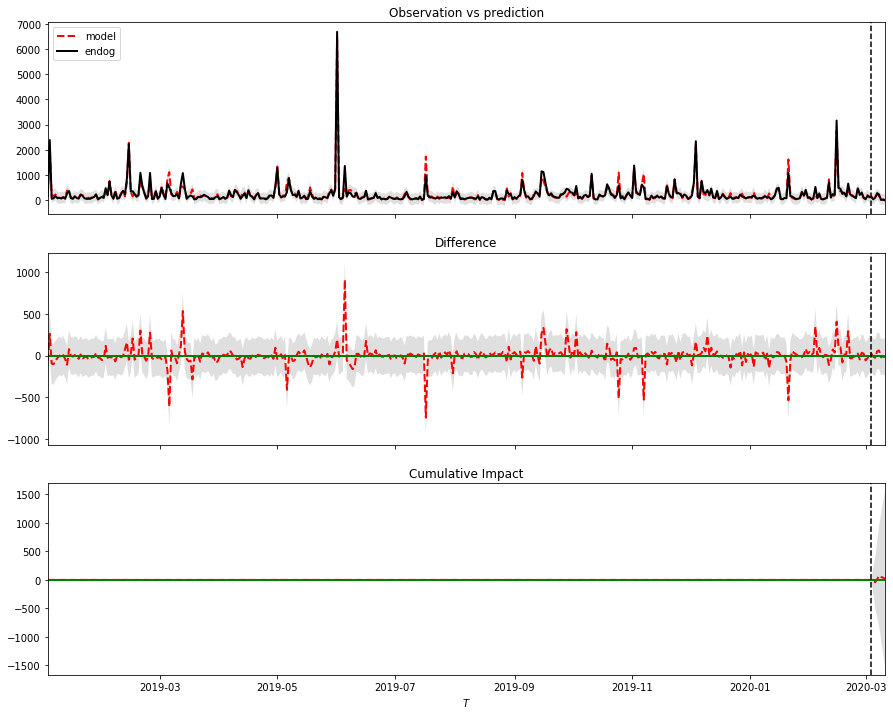

In [159]:
impact.plot()